### Hyperparameters

In [1]:
from keras.callbacks import EarlyStopping

# Stopping training when validation loss does not improve
callbacks = [EarlyStopping(monitor="val_accuracy", patience=3),
             EarlyStopping(monitor="val_loss", patience=3)]

EPOCHS = 20
BATCH_SIZE = 32

### Loading data

In [2]:
from data.norec.dataloader import load_full_dataset
from data.dataloader import load_data

# Load binary data
binary_dataset = load_full_dataset(binary=True)
binary_data = load_data(binary_dataset)

# Load multiclass data
multiclass_dataset = load_full_dataset()
multiclass_data = load_data(multiclass_dataset)

Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!
Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!


# Classifying with multiclass dataset

In [3]:
X_train = multiclass_data['X_train']
X_val = multiclass_data['X_val']
X_test = multiclass_data['X_test']
y_train = multiclass_data['y_train']
y_val = multiclass_data['y_val']
y_test = multiclass_data['y_test']
num_words = multiclass_data['num_words']
maxlen = multiclass_data['maxlen']
num_classes = multiclass_data['num_classes']
multiclass_tokenizer = multiclass_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 210)
X_val shape: (4360, 210)
X_test shape: (4351, 210)
y_train shape: (34903, 3)
y_val shape: (4360, 3)
y_test shape: (4351, 3)
num_words: 26000
maxlen: 210
num_classes: 3


### Load embeddings

In [4]:
from utils.embeddings import load_embeddings
import numpy as np
from tqdm import tqdm

embeddings_index = load_embeddings()

word_index = multiclass_tokenizer.word_index

embedding_dim = 100
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tqdm(word_index.items(), desc="Creating embedding matrix"):
    embedding_vector = embeddings_index.item().get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Extracting embeddings...


Creating embedding matrix: 100%|██████████| 388411/388411 [00:02<00:00, 179971.43it/s]


In [5]:
from keras import Input
from keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Input(shape=(maxlen,), dtype="float32"))
model.add(Conv1D(256, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 210, 100)          38841200  
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 conv1d (Conv1D)             (None, 206, 256)          128256    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 41, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 128)           163968    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                         

In [6]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)

Epoch 1/20
1091/1091 [==============================] - 93s 83ms/step - loss: 0.6632 - accuracy: 0.7505 - val_loss: 0.5799 - val_accuracy: 0.7706
Epoch 2/20
1091/1091 [==============================] - 84s 77ms/step - loss: 0.5912 - accuracy: 0.7651 - val_loss: 0.5562 - val_accuracy: 0.7768
Epoch 3/20
1091/1091 [==============================] - 86s 79ms/step - loss: 0.5237 - accuracy: 0.7900 - val_loss: 0.5557 - val_accuracy: 0.7757
Epoch 4/20
1091/1091 [==============================] - 86s 78ms/step - loss: 0.4195 - accuracy: 0.8333 - val_loss: 0.6050 - val_accuracy: 0.7603
Epoch 5/20
1091/1091 [==============================] - 85s 78ms/step - loss: 0.2956 - accuracy: 0.8861 - val_loss: 0.7627 - val_accuracy: 0.7686


In [7]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 3s 25ms/step - loss: 0.7779 - accuracy: 0.7679
Validation loss: 0.7778910398483276
Validation accuracy: 0.7678694725036621


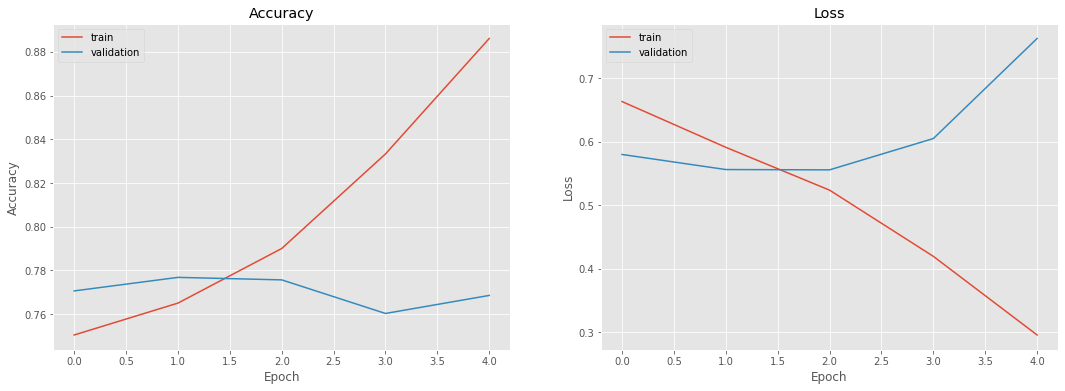

In [8]:
from utils.visualization import plot_history

plot_history(history, save=False, show=True)

# Classifying with binary dataset

In [13]:
X_train = binary_data['X_train']
X_val = binary_data['X_val']
X_test = binary_data['X_test']
y_train = binary_data['y_train']
y_val = binary_data['y_val']
y_test = binary_data['y_test']
num_words = binary_data['num_words']
maxlen = binary_data['maxlen']
num_classes = binary_data['num_classes']
binary_tokenizer = binary_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 210)
X_val shape: (4360, 210)
X_test shape: (4351, 210)
y_train shape: (34903, 2)
y_val shape: (4360, 2)
y_test shape: (4351, 2)
num_words: 26000
maxlen: 210
num_classes: 2


### Load embeddings

In [14]:
word_index = binary_tokenizer.word_index

embedding_dim = 100
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tqdm(word_index.items(), desc="Creating embedding matrix"):
    embedding_vector = embeddings_index.item().get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Creating embedding matrix: 100%|██████████| 388411/388411 [00:00<00:00, 408790.98it/s]


In [15]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Input(shape=(maxlen,), dtype="float32"))
model.add(Conv1D(256, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 210, 100)          38841200  
                                                                 
 input_3 (InputLayer)        multiple                  0         
                                                                 
 conv1d_4 (Conv1D)           (None, 206, 256)          128256    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 128)           163968    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                     

In [16]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=1,
                    callbacks=callbacks)

Epoch 1/20
1091/1091 [==============================] - 69s 62ms/step - loss: 0.5144 - accuracy: 0.7610 - val_loss: 0.4452 - val_accuracy: 0.7927
Epoch 2/20
1091/1091 [==============================] - 72s 66ms/step - loss: 0.4509 - accuracy: 0.7923 - val_loss: 0.4387 - val_accuracy: 0.7975
Epoch 3/20
1091/1091 [==============================] - 68s 62ms/step - loss: 0.3939 - accuracy: 0.8257 - val_loss: 0.4366 - val_accuracy: 0.8037
Epoch 4/20
1091/1091 [==============================] - 63s 58ms/step - loss: 0.3159 - accuracy: 0.8667 - val_loss: 0.4743 - val_accuracy: 0.7986
Epoch 5/20
1091/1091 [==============================] - 64s 58ms/step - loss: 0.2154 - accuracy: 0.9141 - val_loss: 0.5631 - val_accuracy: 0.7853
Epoch 6/20
1091/1091 [==============================] - 64s 59ms/step - loss: 0.1310 - accuracy: 0.9511 - val_loss: 0.7080 - val_accuracy: 0.7853


In [17]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 3s 21ms/step - loss: 0.7408 - accuracy: 0.7787
Validation loss: 0.7408137321472168
Validation accuracy: 0.7786715626716614


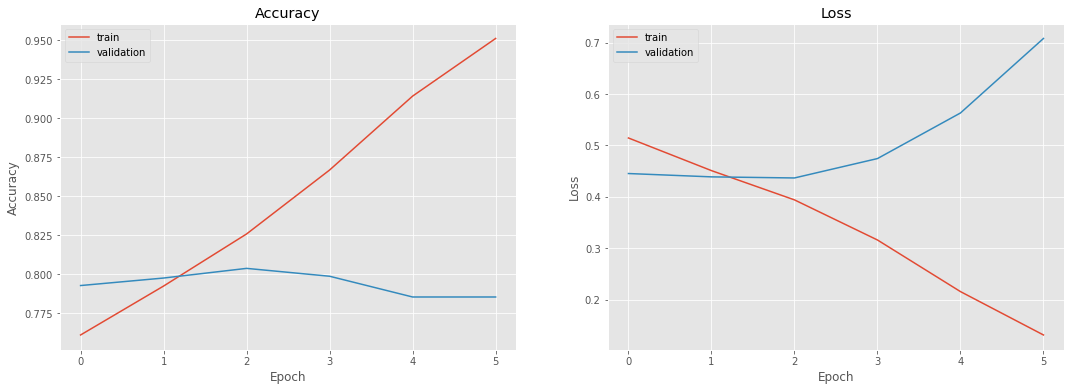

In [18]:
plot_history(history, save=False, show=True)